Import danych oraz wektoryzacja danych, określenie ilości klastrów (podany przykładowo liczbę klastrów równą 10, aby móc sprawdzić poprawaność ładowania oraz działania )

In [1]:
import h5py
import numpy as np
from sklearn.cluster import KMeans

file_path = 'large Specimen 1 averaging test 25 frames.h5oina'

# Wczytanie danych z pliku h5
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)

# Przekształcenie danych do postaci jednej dużej macierzy
n_frames, width, height = ebsd_data.shape
X = ebsd_data.reshape((n_frames, width * height))

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)

In [2]:
kmeans.fit(X)

# Etykiety obserwacji
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

Obrazowe przedstawienie przynależności do poszczególnych klastrów, w celu analizy poprawności podstawowego działania kodu. 

Matplotlib is building the font cache; this may take a moment.


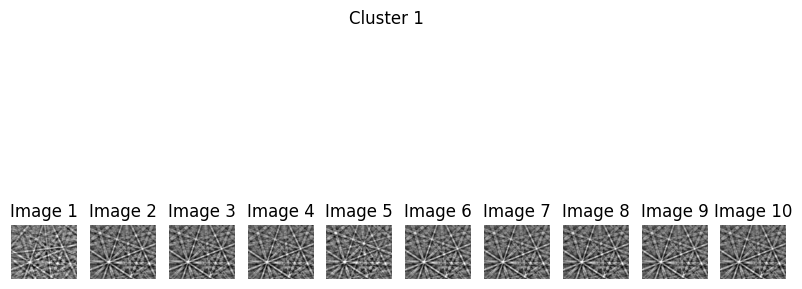

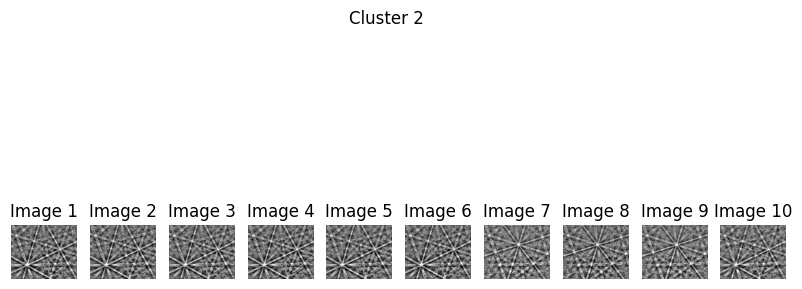

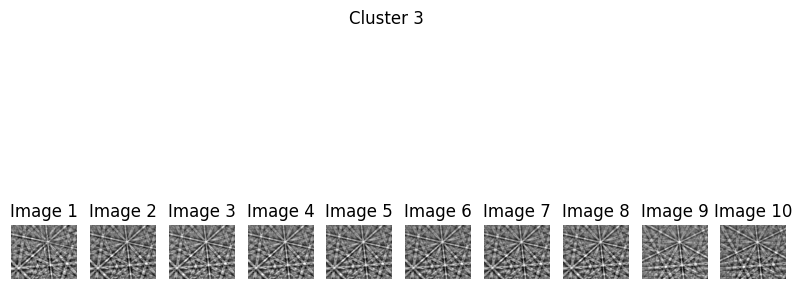

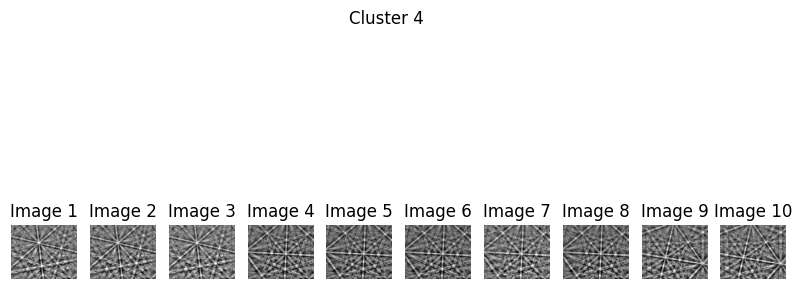

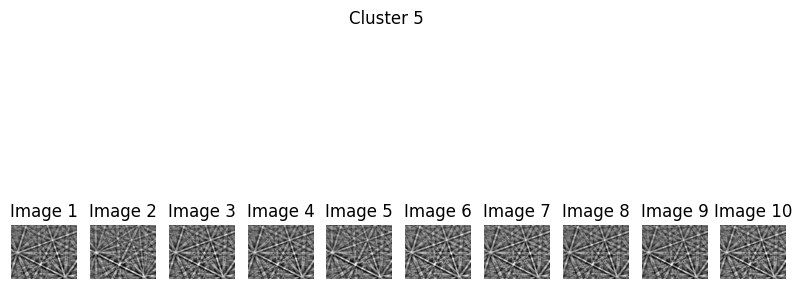

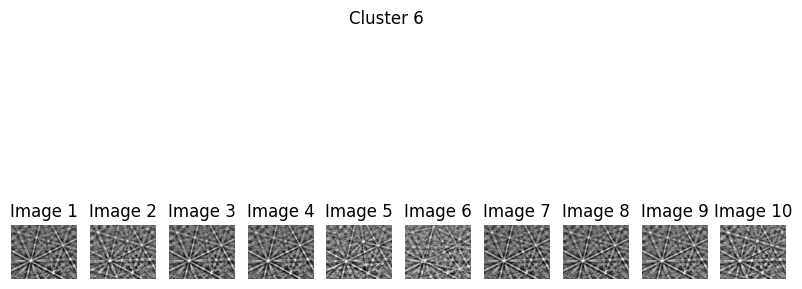

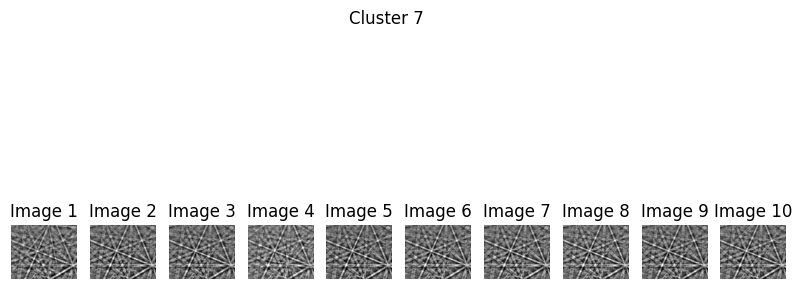

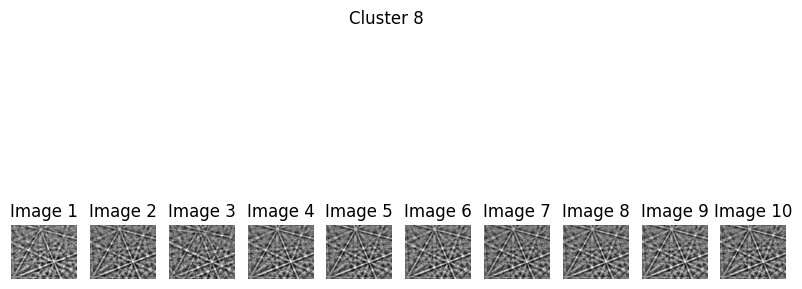

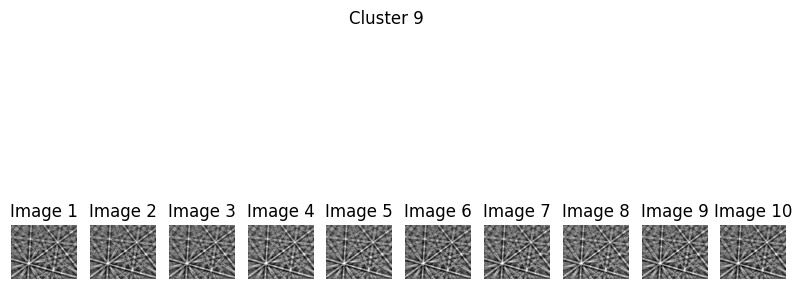

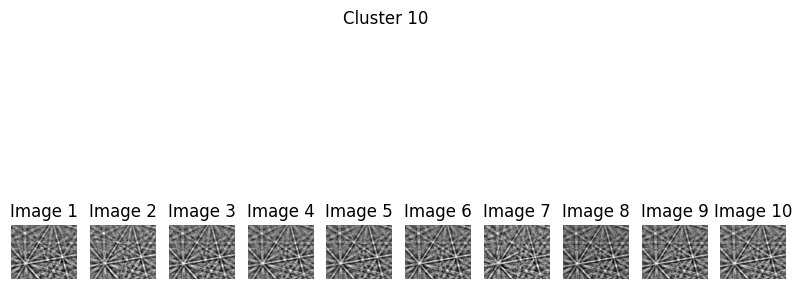

In [5]:
import matplotlib.pyplot as plt

for i in range(n_clusters):
    cluster_images = X[labels == i]
    plt.figure(figsize=(10, 5))
    for j, image in enumerate(cluster_images[:10]):
        image_reshaped = image.reshape((width, height)).astype(np.uint8)
        plt.subplot(1, 10, j+1)
        plt.imshow(image_reshaped, cmap='gray')
        plt.title(f"Image {j+1}")
        plt.axis('off')
    plt.suptitle(f"Cluster {i+1}")
    plt.show()


Skonsolidowanie klastrowania z elementem odpowiedzialnym za rysowanie mapy przynależności klastrów na fragmencie badanego materiału. 

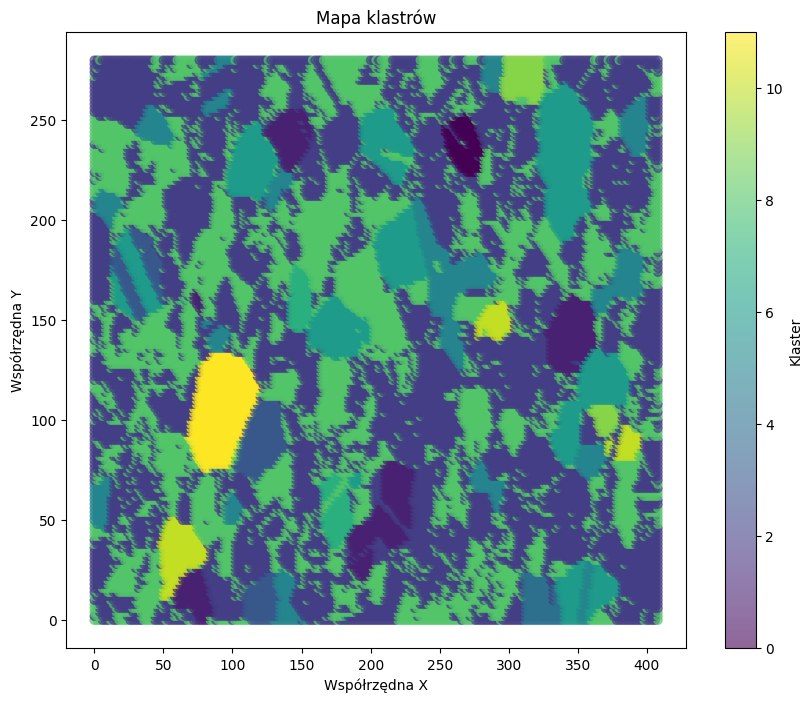

In [1]:
import h5py
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ścieżka do pliku HDF5
file_path = 'large Specimen 1 averaging test 25 frames.h5oina'

# Wczytanie danych z pliku h5
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Przekształcenie danych do postaci jednej dużej macierzy
n_frames, width, height = ebsd_data.shape
X = ebsd_data.reshape((n_frames, width * height))

# Klastrowanie
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Etykiety klastrów
labels = kmeans.labels_

# Tworzenie wykresu
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_coords, Y_coords, c=labels, cmap='viridis', alpha=0.6)
plt.title('Mapa klastrów')
plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.colorbar(scatter, label='Klaster')
plt.show()

Klastrowanie z dodanym elementem odpowiedzialnym za określenie optymalnej liczby klastrów w tym przypadku wykorzystanie elbow method 

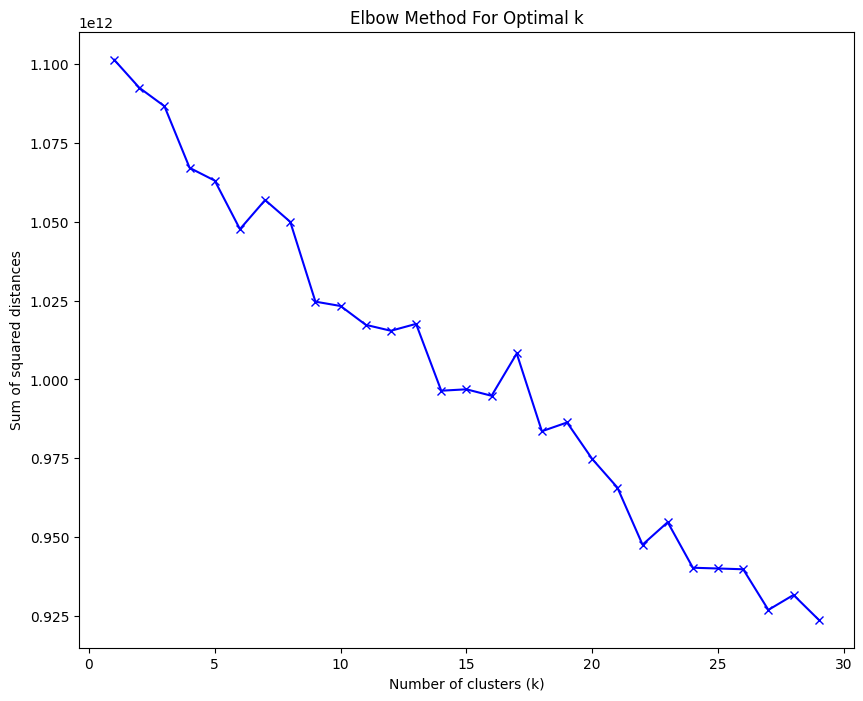

In [10]:
import h5py
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = 'large Specimen 1 averaging test 25 frames.h5oina'

# Load data from the h5 file
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Transform data into one large matrix
n_frames, width, height = ebsd_data.shape
X = ebsd_data.reshape((n_frames, width * height))

# Determine the optimal number of clusters using the elbow method
sum_of_squared_distances = []
K = range(1, 30)  # Adjust the range as needed
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Rozwinięcie kodu o shilhouette score jako miarę optymalnego dopsaowania ilości klastrów

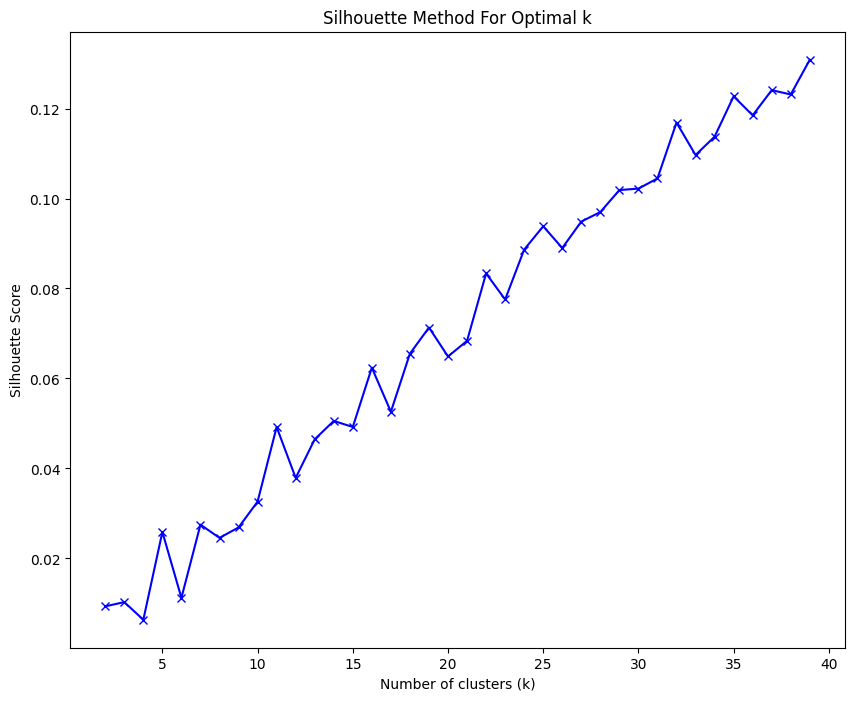

In [22]:
import h5py
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = 'large Specimen 1 averaging test 25 frames.h5oina'

# Load data from the h5 file
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Transform data into one large matrix
n_frames, width, height = ebsd_data.shape
X = ebsd_data.reshape((n_frames, width * height))

# Determine the optimal number of clusters using the silhouette method
silhouette_scores = []
K = range(2, 40)  # Starting from 2 because silhouette score cannot be computed for k=1

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [23]:
print(silhouette_scores)


[0.009364061630327715, 0.0102994174001291, 0.006387987878749521, 0.02589740511225203, 0.011244475977137932, 0.027517846034672885, 0.024578926098569206, 0.026894019378741953, 0.03263450908772947, 0.04921813155037163, 0.03791302439920925, 0.046488537245011695, 0.050560173830916925, 0.04922954510957573, 0.0624045726995401, 0.052601754644792616, 0.06552023605438488, 0.07132253484678251, 0.06489971721553356, 0.06836267866459457, 0.08334758365960702, 0.07756061158190909, 0.08865072597498133, 0.09382241783934477, 0.08899949716559151, 0.0948790097870506, 0.09699034534922682, 0.10187555677152667, 0.1021989860805726, 0.10446339573198879, 0.11687048301384875, 0.10966284801085131, 0.11373686195998654, 0.12270771115480153, 0.11848890389768563, 0.12408405690038024, 0.12312014202092107, 0.13084373608139244]


In [25]:
silhouette_scores = ' '.join(map(str, silhouette_scores))

with open('output2-40.txt', 'w') as file:
    file.write(silhouette_scores)

In [15]:
import numpy as np
import h5py
from scipy.signal import correlate

def normalized_cross_correlation(signal1, signal2):
    # Normalizacja sygnałów
    signal1_normalized = (signal1 - np.mean(signal1)) / (np.std(signal1) * len(signal1))
    signal2_normalized = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    # Obliczanie korelacji krzyżowej
    correlation = correlate(signal1_normalized, signal2_normalized, mode='same')
    
    return correlation

# # Przykładowe sygnały
# signal1 = np.array([1, 2, 3, 4, 5])
# signal2 = np.array([2, 3, 4, 5, 6])

# Path to the HDF5 file
file_path = 'large Specimen 1 averaging test 25 frames.h5oina'

# Load data from the h5 file
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)

signal1 = ebsd_data[1]
signal2 = ebsd_data[2]



# Obliczenie znormalizowanej korelacji krzyżowej
ncc = normalized_cross_correlation(signal1, signal2)
print(ncc)



[[ 0.67761336  1.08652797  1.25586628 ...  2.56465024  0.98801327
  -0.46009675]
 [ 0.88271857  1.56133003  1.97441279 ... -0.89403321 -2.36117682
  -3.37022905]
 [ 0.93289673  1.65177509  2.25778252 ... -3.65850685 -4.54667922
  -4.7591749 ]
 ...
 [-3.57404967 -4.38946382 -4.80911314 ...  2.12926101  1.77774916
   1.08906932]
 [-4.31326979 -4.44334472 -3.85822533 ...  2.09748256  1.93394521
   1.27361543]
 [-3.20617067 -2.5126368  -1.27075714 ...  1.45509148  1.45604353
   0.98842878]]


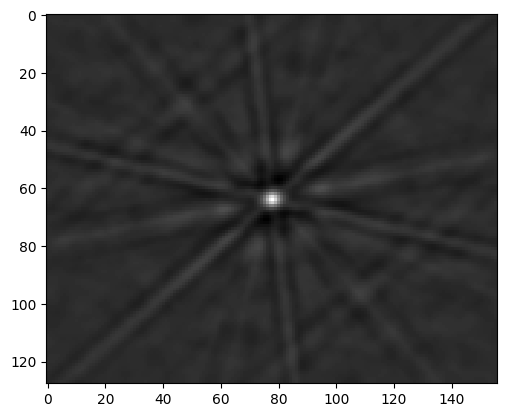

In [16]:
import matplotlib.pyplot as plt
plt.imshow(ncc, cmap='gray', interpolation='none')
plt.show()

In [18]:
images = [signal1, signal2]
average_image = np.mean(images, axis=0).astype(np.uint8)

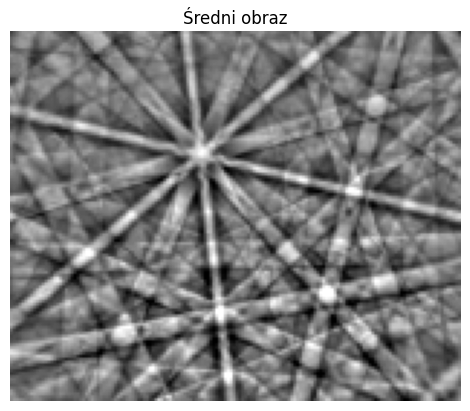

In [19]:
plt.imshow(average_image, cmap='gray')
plt.title('Mean picture')
plt.axis('off')  # Wyłącz osie
plt.show()